In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('2018-2020.csv', engine = 'python', encoding='utf-8', sep=';').reset_index()

In [16]:
df.columns = ['get_nov.mail_type', 'get_nov.mr_from', 'get_nov.ufps_from', 'get_nov.mail_rank','get_nov.dat_priem','get_nov.cnt',
             'get_nov.type_of_client', 'get_nov.pay_type', 'get_nov.direction', 'get_nov.forward_price', 'get_nov.tax_price', 'get_nov.price'] 

In [17]:
#задаем фильтры: только посылки кэш не служебные. задаем формат даты
df = df.loc[(df['get_nov.mail_type'].isin(['Посылка', 'Посылка 1-го класса', 'Посылка Легкий возврат', 'Посылка курьер EMS', 'Посылка онлайн', 'Посылка стандарт', 'Посылка экспресс']))]
df = df.loc[df['get_nov.mail_rank']=='Не служебное']
df = df.loc[df['get_nov.pay_type']=='non-cash']
df = df.loc[df['get_nov.ufps_from']!='АО "ПОЧТА РОССИИ"']
df['get_nov.dat_priem'] = pd.to_datetime(df['get_nov.dat_priem'])
df.loc[df['get_nov.direction']=='EXP','get_nov.mail_type'] = 'Посылка мжд'


In [19]:
prod_mix = pd.pivot_table(df, values = 'get_nov.cnt', index = 'get_nov.dat_priem', columns = ['get_nov.mail_type'],  aggfunc = sum).fillna(0).loc['2020-01-01':]

In [22]:
prod_mix['all'] = prod_mix.sum(axis = 1) 
prod_mix['month'] = prod_mix.index.month

In [23]:
prod_mix['month'] = prod_mix.index.month

In [24]:
prod_mix_01 = prod_mix[prod_mix['month']==1]
prod_mix_02 = prod_mix[prod_mix['month']==2]
prod_mix_03 = prod_mix[prod_mix['month']==3]
prod_mix_04 = prod_mix[prod_mix['month']==4]
prod_mix_05 = prod_mix[prod_mix['month']==5]
prod_mix_06 = prod_mix[prod_mix['month']==6]

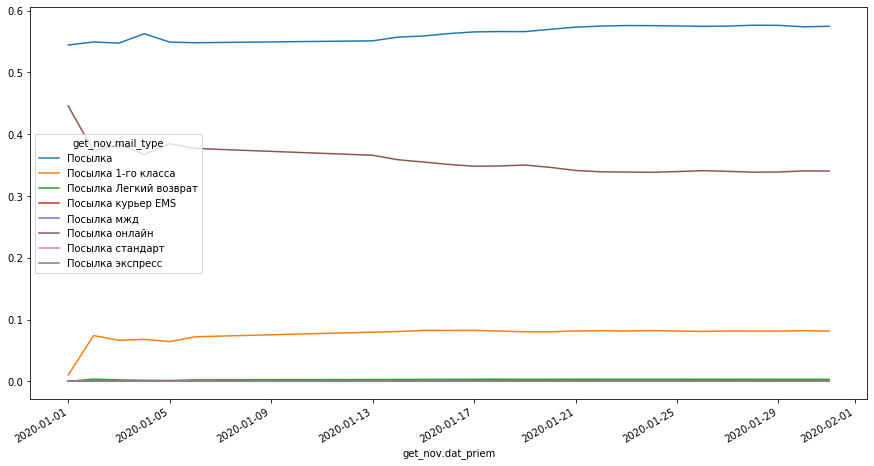

In [25]:
prod_mix_01_cum = prod_mix_01.iloc[:,:-1]
for i in range(1,len(prod_mix_01_cum)):
    for k in range(len(prod_mix_01_cum.T)):
        prod_mix_01_cum.iloc[i,k] = prod_mix_01_cum.iloc[i-1,k] + prod_mix_01_cum.iloc[i,k]

for i in range(len(prod_mix_01_cum.T)-1):
    prod_mix_01_cum.iloc[:,i] = prod_mix_01_cum.iloc[:,i] / prod_mix_01_cum.iloc[:,-1] 

prod_mix_01_cum.iloc[:,:-1].plot(figsize = (15,8))

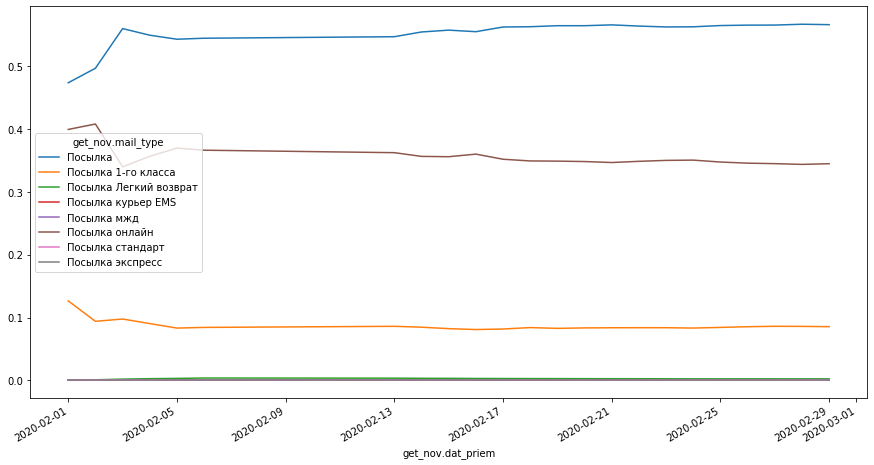

In [26]:
prod_mix_02_cum = prod_mix_02.iloc[:,:-1]
for i in range(1,len(prod_mix_02_cum)):
    for k in range(len(prod_mix_02_cum.T)):
        prod_mix_02_cum.iloc[i,k] = prod_mix_02_cum.iloc[i-1,k] + prod_mix_02_cum.iloc[i,k]

for i in range(len(prod_mix_02_cum.T)-1):
    prod_mix_02_cum.iloc[:,i] = prod_mix_02_cum.iloc[:,i] / prod_mix_02_cum.iloc[:,-1] 

prod_mix_02_cum.iloc[:,:-1].plot(figsize = (15,8))

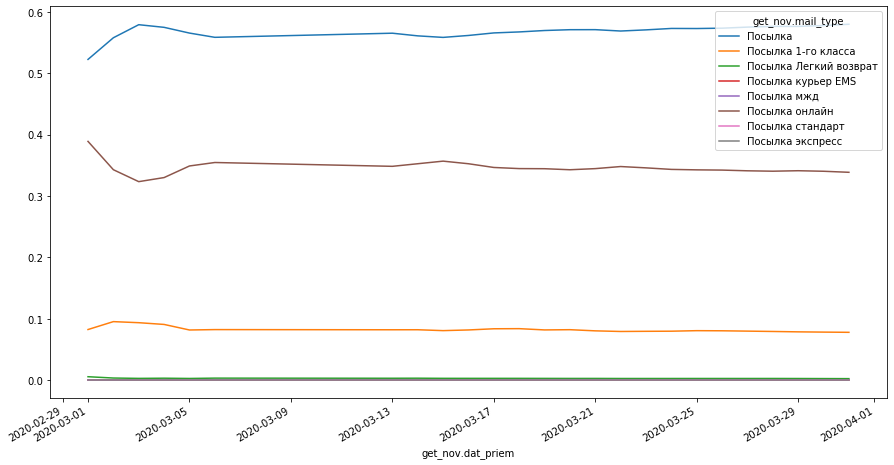

In [27]:
prod_mix_03_cum = prod_mix_03.iloc[:,:-1]
for i in range(1,len(prod_mix_03_cum)):
    for k in range(len(prod_mix_03_cum.T)):
        prod_mix_03_cum.iloc[i,k] = prod_mix_03_cum.iloc[i-1,k] + prod_mix_03_cum.iloc[i,k]

for i in range(len(prod_mix_03_cum.T)-1):
    prod_mix_03_cum.iloc[:,i] = prod_mix_03_cum.iloc[:,i] / prod_mix_03_cum.iloc[:,-1] 

prod_mix_03_cum.iloc[:,:-1].plot(figsize = (15,8))

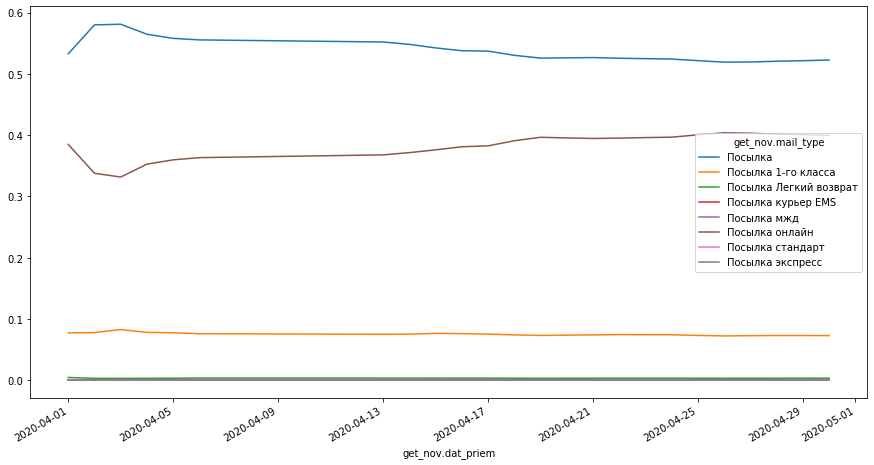

In [28]:
prod_mix_04_cum = prod_mix_04.iloc[:,:-1]
for i in range(1,len(prod_mix_04_cum)):
    for k in range(len(prod_mix_04_cum.T)):
        prod_mix_04_cum.iloc[i,k] = prod_mix_04_cum.iloc[i-1,k] + prod_mix_04_cum.iloc[i,k]

for i in range(len(prod_mix_04_cum.T)-1):
    prod_mix_04_cum.iloc[:,i] = prod_mix_04_cum.iloc[:,i] / prod_mix_04_cum.iloc[:,-1] 

prod_mix_04_cum.iloc[:,:-1].plot(figsize = (15,8))

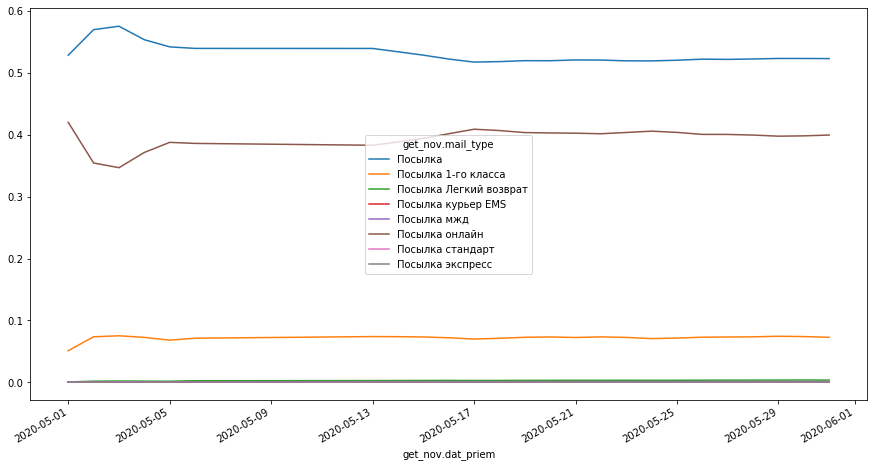

In [29]:
prod_mix_05_cum = prod_mix_05.iloc[:,:-1]
for i in range(1,len(prod_mix_05_cum)):
    for k in range(len(prod_mix_05_cum.T)):
        prod_mix_05_cum.iloc[i,k] = prod_mix_05_cum.iloc[i-1,k] + prod_mix_05_cum.iloc[i,k]

for i in range(len(prod_mix_05_cum.T)-1):
    prod_mix_05_cum.iloc[:,i] = prod_mix_05_cum.iloc[:,i] / prod_mix_05_cum.iloc[:,-1] 

prod_mix_05_cum.iloc[:,:-1].plot(figsize = (15,8))

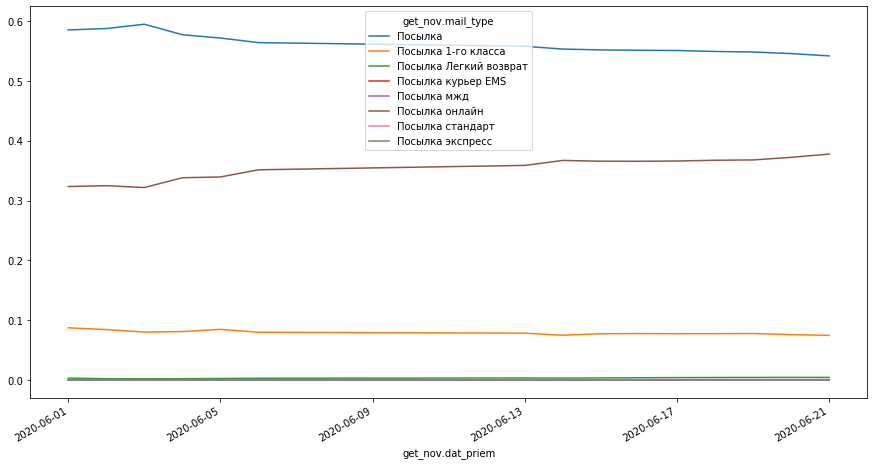

In [30]:
prod_mix_06_cum = prod_mix_06.iloc[:,:-1]
for i in range(1,len(prod_mix_06_cum)):
    for k in range(len(prod_mix_06_cum.T)):
        prod_mix_06_cum.iloc[i,k] = prod_mix_06_cum.iloc[i-1,k] + prod_mix_06_cum.iloc[i,k]

for i in range(len(prod_mix_06_cum.T)-1):
    prod_mix_06_cum.iloc[:,i] = prod_mix_06_cum.iloc[:,i] / prod_mix_06_cum.iloc[:,-1] 

prod_mix_06_cum.iloc[:,:-1].plot(figsize = (15,8))

In [ ]:
prod_mix_06_cum

In [ ]:
prod_mix.sum()